# FAKES NEW DETECTION
## Analyse et visualisation des données

### Le corpus de Fake news

Malheursement nous n'avons pas trouvé un dataset sur le web destinée au problèmatique de fake news en language francais, pour cela nous avons utilisé les technique de scraping pour récupérer les articles depuis des sites qui publient des fausses articles ou des contenus ironiques.
ci-dessous la liste du site :

- legorafi.fr
- secretnews.fr
- mespropresrecherches.com
- limmunite.fr
- lejournalnews.com
- corse-machin.com
- radiomogette.com
- leouestfranc.com
- teurgoole.fr
- sud-ou-est.fr
- lechodelaboucle.fr
- lamentable.fr
- radiocockpit.fr
- nordpresse.be
- el-manchar.com
- bopress.ma
- raleursactuels.com
- on-dit-quoi.blogspot.com
- desavantage.com
- worldtvdesinfo.com


# Le Corpus des vrais articles

Le dataset utilisé pour les vrais article a été téléchargé depuis le site : https://webhose.io/free-datasets/
Lors de préparation de ces données nous sommes opté pour le choix des sources soit disent fiable et connues, la liste est :

- europe1.fr
- 20minutes.fr
- lexpress.fr
- francetvinfo.fr
- dhnet.be
- lefigaro.fr
- 7sur7.be
- huffingtonpost.fr
- leparisien.fr
- lepoint.fr
- lemonde.fr
- ladepeche.fr
- nouvelobs.com
- rtl.fr
- lesoir.be
- france24.com
- lesechos.fr
- metronews.fr
- journaldunet.com
- rfi.fr
- sudouest.fr
- liberation.fr
- linternaute.com
- ouest-france.fr
- rtbf.be
- rtl.be

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from pandas_profiling import ProfileReport

import re
from nltk.tokenize import RegexpTokenizer
from sklearn.feature_extraction.text import CountVectorizer
from collections import Counter
from nltk.corpus import stopwords
from wordcloud import WordCloud


### Chargement les données

In [2]:
fakenews = pd.read_csv("output/fake_news_cleaned.csv")
realnews = pd.read_csv("output/real_news_cleaned.csv")

##### Affichons quelques echantillons de données

In [3]:
fakenews.head()

,site,url,title,text
0,http://www.legorafi.fr,http://www.legorafi.fr/2019/09/24/est-ce-vous-...,est ce vous avez tous bien compris que notre ...,mettons les choses au clair mes chers compatri...
1,http://www.legorafi.fr,http://www.legorafi.fr/2019/09/12/malgre-un-ch...,malgré un charnier de 18 corps 200 000 euros e...,l étau semble se resserrer autour du président...
2,http://www.legorafi.fr,http://www.legorafi.fr/2020/05/12/pour-protege...,pour protéger la biodiversité le président de ...,dans un message vidéo le président de la fédér...
3,http://www.legorafi.fr,http://www.legorafi.fr/2020/03/25/pour-reduire...,pour réduire les déplacements au minimum le go...,après des modifications hebdomadaires puis quo...
4,http://www.legorafi.fr,http://www.legorafi.fr/2020/05/07/le-podcast-d...,le podcast du gorafi ep2 m blanquer les enseig...,dans cet épisode découvrez idée géniale du min...


In [4]:
realnews.head()

,site,url,title,text
0,europe1.fr,http://www.europe1.fr/faits-divers/il-tente-di...,il tente incendier sa femme elle est indemne l...,il tente incendier sa femme elle est indemne l...
1,europe1.fr,http://www.europe1.fr/culture/ca-y-est-renaud-...,ça est renaud fait son retour sur scène,ça est renaud fait son retour sur scène 08h43 ...
2,europe1.fr,http://www.europe1.fr/international/avec-son-t...,avec son tailleur rouge quel message voulu env...,avec son tailleur rouge quel message voulu env...
3,europe1.fr,http://www.europe1.fr/sport/foot-ligue-1-tous-...,foot ligue 1 tous les résultats de la 8ème jou...,foot ligue 1 tous les résultats de la 8ème jou...
4,europe1.fr,http://www.europe1.fr/emissions/tout-roule/lin...,linda jackson il y aura pas de retour de la 2cv,abonner au podcast vous pouvez vous abonner a...


### Afficher les vrais articles par site

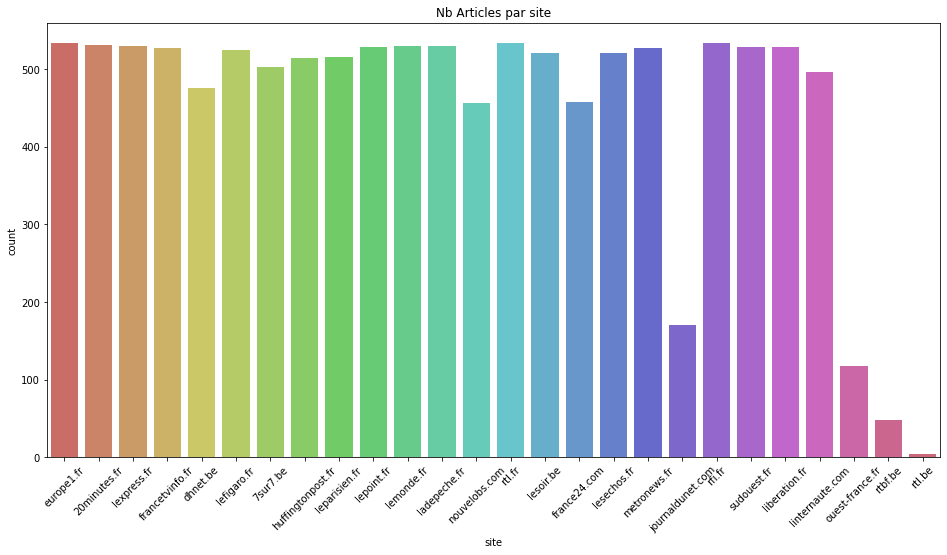

In [55]:
fig, ax = plt.subplots(1,1, figsize=(16,8))
ax.set_title('Nb Articles par site')
plt.xticks(rotation=45)
site_count = list(realnews.site.unique())

sns.countplot(x="site", data=realnews, ax=ax, palette=sns.color_palette("hls", len(site_count)))


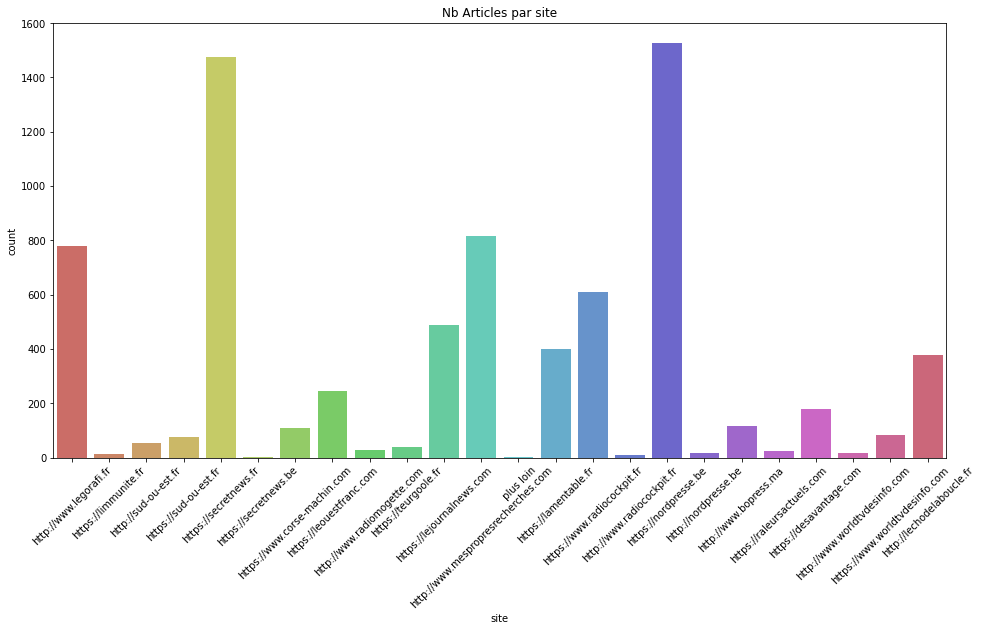

In [62]:
fig, ax = plt.subplots(1,1, figsize=(16,8))
ax.set_title('Nb Articles par site')
plt.xticks(rotation=45)
site_count = list(fakenews.site.unique())

sns.countplot(x="site", data=fakenews, ax=ax, palette=sns.color_palette("hls", len(site_count)))

## Analyse textuels

### Calcule du nombre de mots en moyenne dans les titres

#### Fake news

In [5]:
ftexts_counts = list()
for text in fakenews['title']:
    #enlever les caractères spéciaux, y compris la ponctuation
    text = re.sub(r'\W', ' ', text)
    # Remplacer les espaces multiples par un espace
    text = re.sub(r'\s+', ' ', text, flags=re.I)
    ftexts_counts.append(len(text.split(" ")))

In [6]:
print(int(np.mean(ftexts_counts)), ' mots')

13  mots


#### Vrais Articles

In [7]:
rtexts_counts = list()
for text in realnews['title']:
    #enlever les caractères spéciaux, y compris la ponctuation
    text = re.sub(r'\W', ' ', text)
    # Remplacer les espaces multiples par un espace
    text = re.sub(r'\s+', ' ', text, flags=re.I)
    rtexts_counts.append(len(text.split(" ")))

In [8]:
print(int(np.mean(rtexts_counts)), ' mots')

11  mots


In [10]:
#l'article le plus long!!
fakenews.iloc[np.argmax(ftexts_counts)].title

'ruralité évron 53 depuis le 1er janvier le bar de la gare sert de guichet sncf hôpital école primaire de boulangerie annexe de la cpam et de stand de laser game de le ouest fran'

### Distribution des mots des titres

Text(0.5, 1.0, 'Distribution du moyenne de mots dans les titres - Fake News')

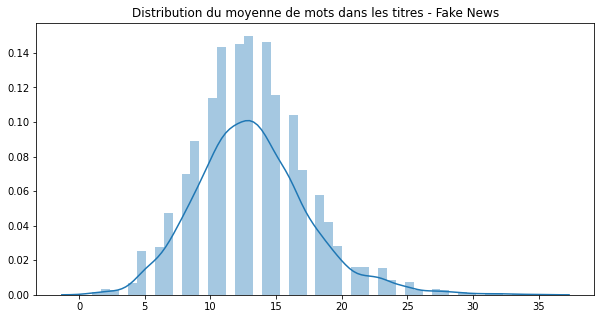

In [11]:
fig = plt.figure(figsize=(10,5))

sns.distplot(ftexts_counts).set_title("Distribution du moyenne de mots dans les titres - Fake News")

Text(0.5, 1.0, 'Distribution du moyenne de mots dans les titre - Vrai Article')

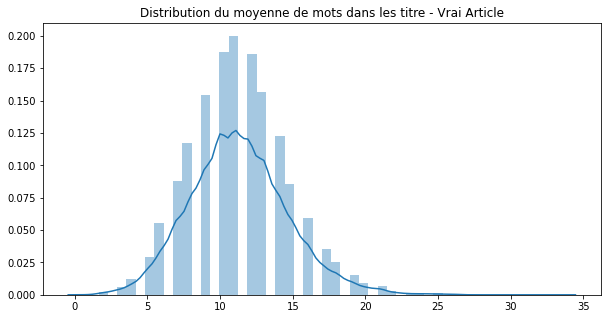

In [12]:
fig = plt.figure(figsize=(10,5))

sns.distplot(rtexts_counts).set_title("Distribution du moyenne de mots dans les titre - Vrai Article")

In [13]:
fakenews['len_title'] = ftexts_counts
realnews['len_title'] = rtexts_counts

Text(0.5, 1.0, 'BoxPlot de nombre de mots dans les titre - vrais articles')

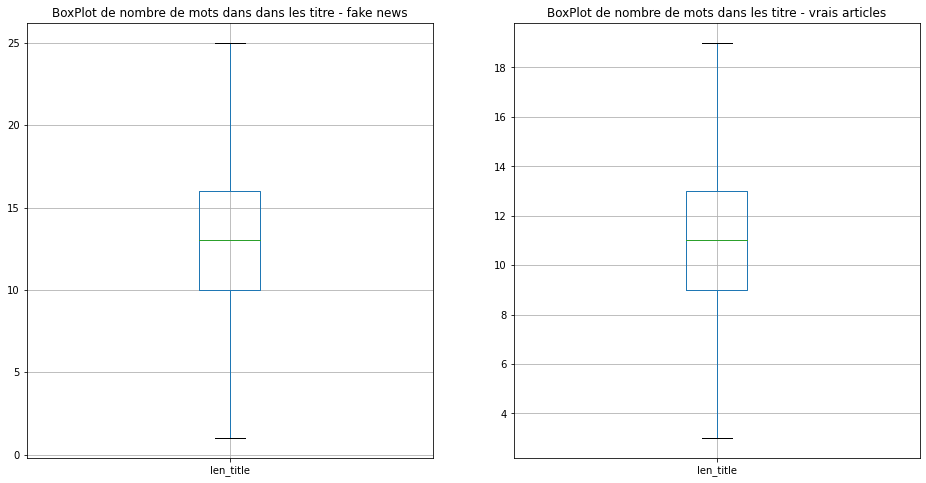

In [14]:
fig, ax = plt.subplots(1,2, figsize=(16,8))
fakenews.boxplot(column=['len_title'], ax=ax[0], showfliers=False)
ax[0].set_title("BoxPlot de nombre de mots dans dans les titre - fake news")

realnews.boxplot(column=['len_title'], ax=ax[1], showfliers=False)
ax[1].set_title("BoxPlot de nombre de mots dans les titre - vrais articles")

### Calcule du nombre de mots en moyenne par article

#### Fake news

In [3]:
ftexts_counts = list()
for text in fakenews['text']:
    #enlever les caractères spéciaux, y compris la ponctuation
    text = re.sub(r'\W', ' ', text)
    # Remplacer les espaces multiples par un espace
    text = re.sub(r'\s+', ' ', text, flags=re.I)
    ftexts_counts.append(len(text.split(" ")))

In [77]:
print(int(np.mean(ftexts_counts)), ' mots')

326  mots


#### Vrais Articles

In [4]:
rtexts_counts = list()
for text in realnews['text']:
    #enlever les caractères spéciaux, y compris la ponctuation
    text = re.sub(r'\W', ' ', text)
    # Remplacer les espaces multiples par un espace
    text = re.sub(r'\s+', ' ', text, flags=re.I)
    rtexts_counts.append(len(text.split(" ")))

In [80]:
print(int(np.mean(rtexts_counts)), ' mots')

432  mots


In [90]:
#l'article le plus long!!
fakenews.iloc[np.argmax(ftexts_counts)].text

'Ce 27 juillet au matin, le métropolite Antoniy de Borispol reçoit trois journalistes à la Laure des Grottes de Kiev pour expliquer son ressenti sur la situation en Ukraine depuis le début de l’année. Il nous explique, dans un calme absolu – le tout en étant filmé (l’interview est susceptible de passer à la télévision ukrainienne) – que ce schisme l’attriste. Le schisme dont il parle est celui opéré par le Patriarcat de Constantinople, qui a décidé d’accorder l’autocéphalie (la reconnaissance canonique) à une Église orthodoxe ukrainienne indépendante de Moscou. Cette indépendance contrarie en effet les occupants de la Laure des Grottes de Kiev, tous rattachés au Patriarcat de Moscou. Cette division, qui pourrait sonner comme une provocation vue la situation à l’Est du pays, le métropolite la voit comme une épreuve, c’est pour lui son devoir ainsi que celui de tous ses frères d’oeuvrer à la réunion des Eglises séparées. Il a beaucoup insisté sur l’importance religieuse de se fraterniser

### Distribution des mots des articles

Text(0.5, 1.0, 'Distribution du moyenne de mots par article - Fake News')

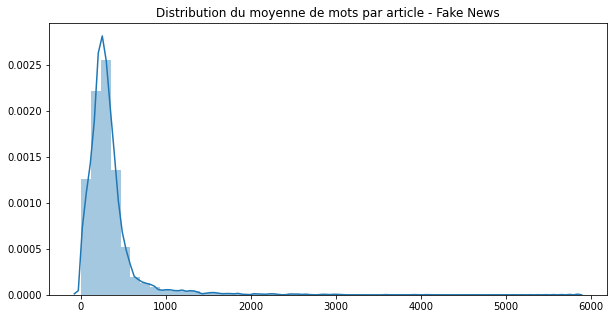

In [105]:
fig = plt.figure(figsize=(10,5))

sns.distplot(ftexts_counts).set_title("Distribution du moyenne de mots par article - Fake News")

Text(0.5, 1.0, 'Distribution du moyenne de mots par article - Vrai Article')

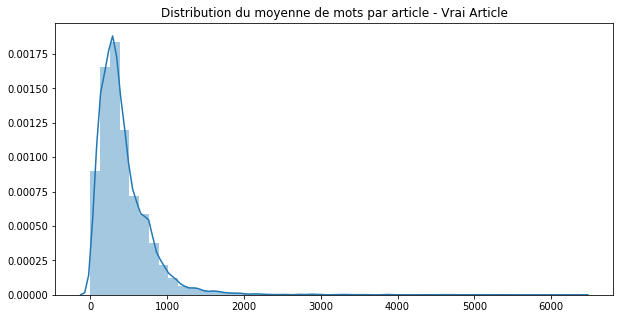

In [106]:
fig = plt.figure(figsize=(10,5))

sns.distplot(rtexts_counts).set_title("Distribution du moyenne de mots par article - Vrai Article")

In [10]:
fakenews['len_text'] = ftexts_counts
realnews['len_text'] = rtexts_counts

Text(0.5, 1.0, 'BoxPlot de nombre de mots dans les vrais articles')

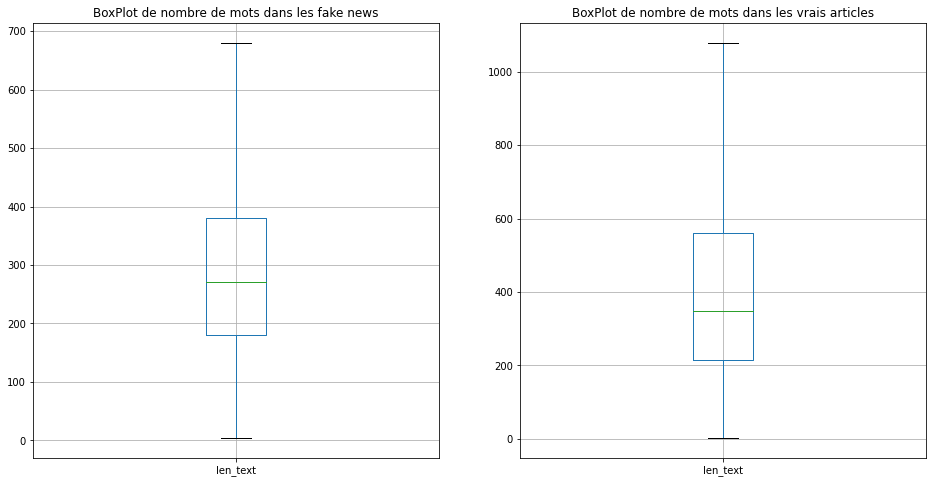

In [18]:
fig, ax = plt.subplots(1,2, figsize=(16,8))
fakenews.boxplot(column=['len_text'], ax=ax[0], showfliers=False)
ax[0].set_title("BoxPlot de nombre de mots dans les fake news")

realnews.boxplot(column=['len_text'], ax=ax[1], showfliers=False)
ax[1].set_title("BoxPlot de nombre de mots dans les vrais articles")

## Analyse linguistique

#### Fonctions auxiliaires

In [3]:
def clean_text_array(text):
    #Remove URLs
    text = re.sub(r"http\S+", "", text)
    # remove one characater
    text = re.sub(r'\s+[a-zA-Z]\s+', ' ', text)
    #Tokenize
    tokenizer = RegexpTokenizer('\w+|\$[\d\.]+|\S+')
    tokens = tokenizer.tokenize(text)
    #Remove non alphanumerica characters
    words = [word.lower() for word in tokens if word.isalpha()]  
    return words

def clean_text(text):
    #Remove URLs
    text = re.sub(r"http\S+", "", text)
    #Tokenize
    tokenizer = RegexpTokenizer('\w+|\$[\d\.]+|\S+')
    tokens = tokenizer.tokenize(text)
    #Remove non alphanumerica characters
    words = [word.lower() for word in tokens if word.isalpha()]    
    
    return ' '.join(words)

def tokenize(text):
    tokenizer = RegexpTokenizer('\w+|\$[\d\.]+|\S+')
    tokens = tokenizer.tokenize(text)
    return tokens


def split_phrases(text):
    #Remove URLs
    text = re.sub(r"http\S+", "", text)
    text = '. '.join(text.split("\n")).split(".")
    text = [x for x in text if x not in [".", "\n", "", " "]]
    return text

In [4]:
french_stopwords = stopwords.words('french')

## Analyse des titres

In [174]:
#tokenization et suppression des stop words
fcorpus_title = [clean_text_array(i) for i in fakenews['title'].tolist()]
fcorpus_title = [item for sublist in fcorpus_title for item in sublist]
fcorpus_title = [w.lower().strip() for w in fcorpus_title if w.lower().strip() not in french_stopwords]

#recupérer les mots clés les plus répétés
c = Counter(fcorpus_title)
most_common_fake = c.most_common(20)

rcorpus_title = [clean_text_array(i) for i in realnews['title'].tolist()]
rcorpus_title = [item for sublist in rcorpus_title for item in sublist]
rcorpus_title = [w.lower().strip() for w in rcorpus_title if w.lower().strip() not in french_stopwords]

#recupérer les mots clés les plus répétés
c = Counter(rcorpus_title)
most_common_real = c.most_common(20)

In [159]:
most_common_fake

[('plus', 11241),
 ('window', 6496),
 ('tout', 6207),
 ('cette', 6166),
 ('comme', 5242),
 ('fait', 5220),
 ('faire', 5051),
 ('bien', 4863),
 ('article', 4422),
 ('secretnews', 4056),
 ('si', 3949),
 ('après', 3726),
 ('plusieurs', 3600),
 ('très', 3558),
 ('tous', 3495),
 ('depuis', 3423),
 ('france', 3347),
 ('sans', 3292),
 ('alors', 3278),
 ('ça', 3274)]

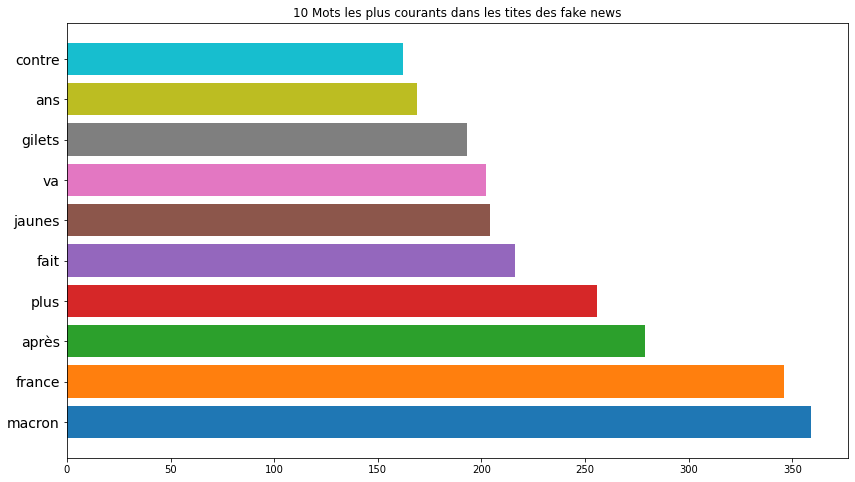

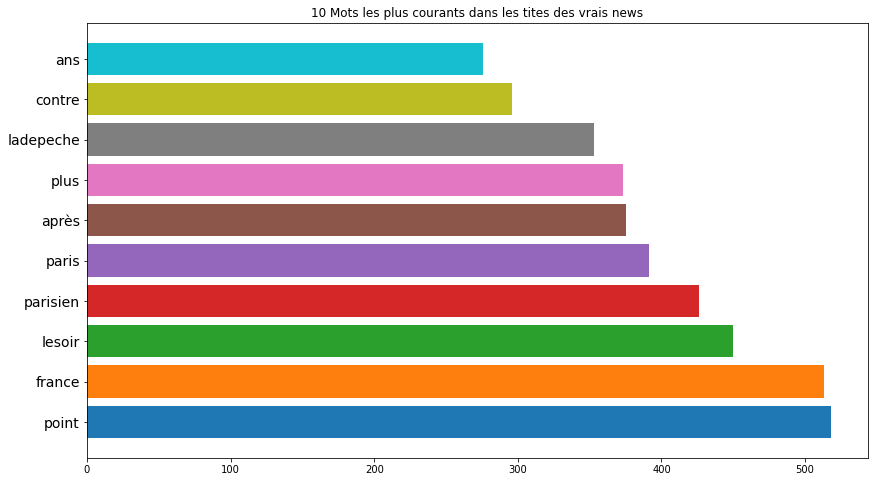

In [178]:
titles = ["10 Mots les plus courants dans les tites des fake news", "10 Mots les plus courants dans les tites des vrais news"]
variables = [most_common_fake[:10], most_common_real[0:10]]

for title, var in zip(titles, variables):
    fig, ax = plt.subplots(figsize=(14,8))
    ax.set_title(title)
    for index, item in enumerate(var):        
        ax.barh(width=item[1], y=item[0])
        ax.invert_yaxis()
        
    plt.tick_params(axis='y', which='major', labelsize=14)    
    plt.show()

## Analyse des tri-grams

In [61]:
#tokenization et suppression des stop words
fcorpus_title = [clean_text(i) for i in fakenews['title'].tolist()]
fcorpus_title = [w.lower().strip() for w in fcorpus_title if w.lower().strip() not in french_stopwords]

c_vec = CountVectorizer(ngram_range=(3,3))
ngrams = c_vec.fit_transform(fcorpus_title)
vocab = c_vec.vocabulary_

#recupérer les mots clés les plus répétés
count_values = ngrams.toarray().sum(axis=0)
ngrams_fake = {}

for ng_count, ng_text in sorted([(count_values[i],k) for k,i in vocab.items()], reverse=True)[0:10]:
    ngrams_fake[ng_text] = ng_count

In [62]:
ngrams_fake

{'les gilets jaunes': 69,
 'des gilets jaunes': 48,
 'marine le pen': 42,
 'david et laura': 34,
 'rien pour david': 26,
 'pour david et': 26,
 'corée du nord': 26,
 'toujours rien pour': 22,
 'la corée du': 20,
 'gorafi news network': 20}

In [63]:
#tokenization et suppression des stop words
rcorpus_title = [clean_text(i) for i in realnews['title'].tolist()]
rcorpus_title = [w.lower().strip() for w in rcorpus_title if w.lower().strip() not in french_stopwords]

c_vec = CountVectorizer(ngram_range=(3,3))
ngrams = c_vec.fit_transform(rcorpus_title)
vocab = c_vec.vocabulary_

#recupérer les mots clés les plus répétés
count_values = ngrams.toarray().sum(axis=0)
ngrams_real = {}

for ng_count, ng_text in sorted([(count_values[i],k) for k,i in vocab.items()], reverse=True)[0:10]:
    ngrams_real[ng_text] = ng_count

In [64]:
ngrams_real

{'primaire de la': 84,
 'de kim kardashian': 67,
 'de la droite': 64,
 'prix nobel de': 55,
 'sur orange finance': 48,
 'football international lesoir': 48,
 'avec les farc': 45,
 'de la paix': 41,
 'de paix avec': 38,
 'la primaire de': 37}

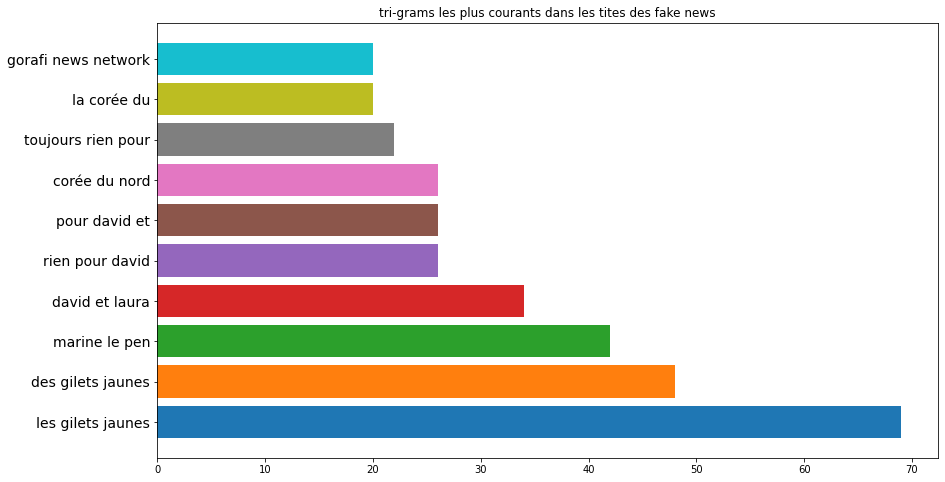

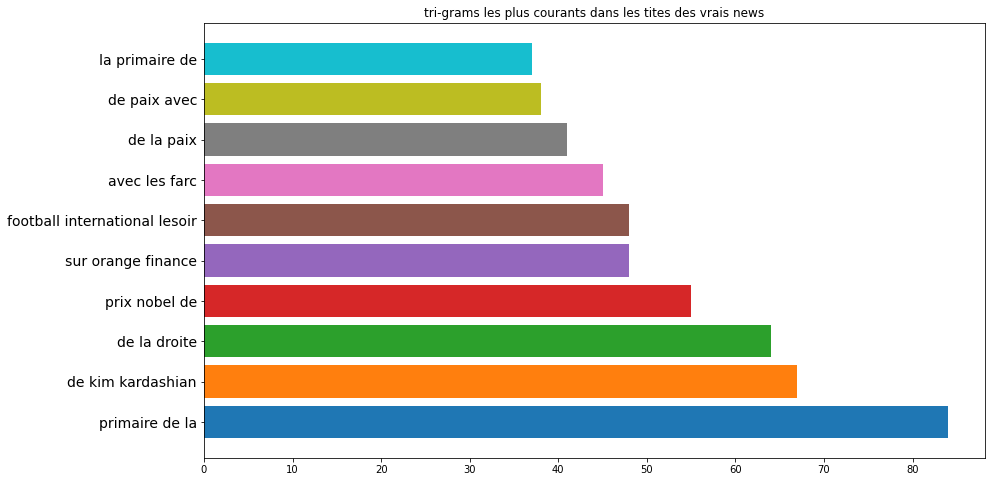

In [65]:
titles = ["tri-grams les plus courants dans les tites des fake news", "tri-grams les plus courants dans les tites des vrais news"]
variables = [ngrams_fake, ngrams_real]
for title, var in zip(titles, variables):
    fig, ax = plt.subplots(figsize=(14,8))
    ax.set_title(title)
    for ngram in var:        
        ax.barh(width=var[ngram], y=ngram)
        ax.invert_yaxis()
        
    plt.tick_params(axis='y', which='major', labelsize=14)    
    plt.show()

## Les nuages de mots pour les titres

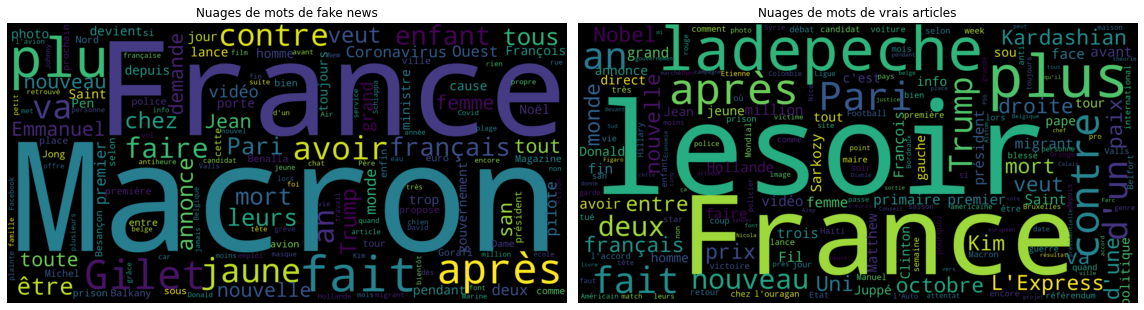

In [90]:
fig, ax = plt.subplots(1,2, figsize=(16,16))

corpus_text = ''.join(fakenews['title'].tolist())
wordcloud = WordCloud(stopwords=french_stopwords, scale = 7, collocations=False).generate(corpus_text)
ax[0].imshow(wordcloud, interpolation='bilinear')
ax[0].axis("off")
ax[0].set_title("Nuages de mots de fake news")

corpus_text = ''.join(realnews['title'].tolist())
wordcloud = WordCloud(stopwords=french_stopwords, scale = 7, collocations=False).generate(corpus_text)
ax[1].imshow(wordcloud, interpolation='bilinear')
ax[1].axis("off")
ax[1].set_title("Nuages de mots de vrais articles")

plt.tight_layout()

## Analyse de contenu

In [5]:
#tokenization et suppression des stop words
fcorpus_text = [clean_text_array(i) for i in fakenews['text'].tolist()]
fcorpus_text = [item for sublist in fcorpus_text for item in sublist]
fcorpus_text = [w.lower().strip() for w in fcorpus_text if w.lower().strip() not in french_stopwords]

#recupérer les mots clés les plus répétés
c = Counter(fcorpus_text)
most_common_fake = c.most_common(20)

rcorpus_text = [clean_text_array(i) for i in realnews['text'].tolist()]
rcorpus_text = [item for sublist in rcorpus_text for item in sublist]
rcorpus_text = [w.lower().strip() for w in rcorpus_text if w.lower().strip() not in french_stopwords]

#recupérer les mots clés les plus répétés
c = Counter(rcorpus_text)
most_common_real = c.most_common(20)

In [6]:
most_common_fake

[('plus', 11241),
 ('window', 6496),
 ('tout', 6207),
 ('cette', 6166),
 ('comme', 5242),
 ('fait', 5220),
 ('faire', 5051),
 ('bien', 4863),
 ('article', 4422),
 ('secretnews', 4056),
 ('si', 3949),
 ('après', 3726),
 ('plusieurs', 3600),
 ('très', 3558),
 ('tous', 3495),
 ('depuis', 3423),
 ('france', 3347),
 ('sans', 3292),
 ('alors', 3278),
 ('ça', 3274)]

In [7]:
most_common_real

[('plus', 21784),
 ('cette', 11765),
 ('deux', 9302),
 ('fait', 9138),
 ('comme', 8858),
 ('aussi', 8841),
 ('ans', 8687),
 ('octobre', 8647),
 ('après', 8171),
 ('tout', 7475),
 ('depuis', 7162),
 ('france', 6951),
 ('a', 6732),
 ('si', 6394),
 ('faire', 6251),
 ('contre', 5937),
 ('être', 5753),
 ('très', 5655),
 ('bien', 5590),
 ('entre', 5523)]

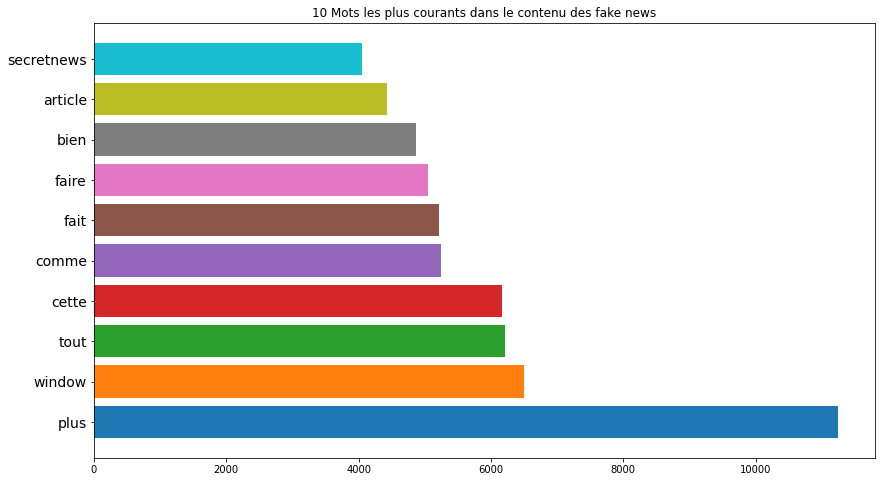

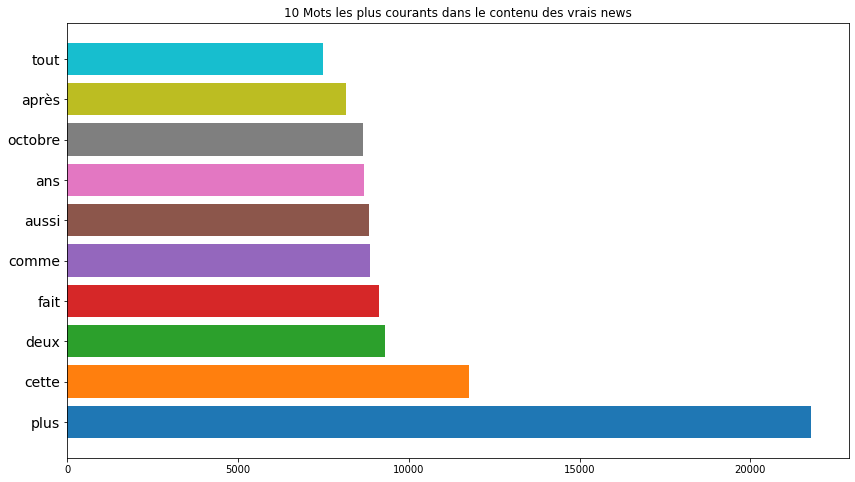

In [8]:
titles = ["10 Mots les plus courants dans le contenu des fake news", "10 Mots les plus courants dans le contenu des vrais news"]
variables = [most_common_fake[:10], most_common_real[0:10]]

for title, var in zip(titles, variables):
    fig, ax = plt.subplots(figsize=(14,8))
    ax.set_title(title)
    for index, item in enumerate(var):        
        ax.barh(width=item[1], y=item[0])
        ax.invert_yaxis()
        
    plt.tick_params(axis='y', which='major', labelsize=14)    
    plt.show()

## Analyse des tri-grams

**Note:** on prend un échantillons, sinon une exception de type Memeory Error sera délenché

Pas de solution pour le momment

In [17]:
#tokenization et suppression des stop words
fcorpus_text = [clean_text(i) for i in fakenews.sample(n=1500)['text'].tolist()]
fcorpus_text = [w.lower().strip() for w in fcorpus_text if w.lower().strip() not in french_stopwords]

c_vec = CountVectorizer(ngram_range=(3,3))
ngrams = c_vec.fit_transform(fcorpus_text)
vocab = c_vec.vocabulary_

#recupérer les mots clés les plus répétés
count_values = ngrams.toarray().sum(axis=0)
ngrams_fake = {}

for ng_count, ng_text in sorted([(count_values[i],k) for k,i in vocab.items()], reverse=True)[0:10]:
    ngrams_fake[ng_text] = ng_count

In [18]:
ngrams_fake

{'window window mode': 540,
 'window mode container': 540,
 'placement article thumbnails': 540,
 'mode container placement': 540,
 'container placement article': 540,
 'article thumbnails email': 271,
 'un média parodique': 268,
 'twitter nous écrire': 268,
 'sur twitter nous': 268,
 'sur facebook ou': 268}

In [20]:
#tokenization et suppression des stop words
rcorpus_text = [clean_text(i) for i in realnews.sample(n=1500)['text'].tolist()]
rcorpus_text = [w.lower().strip() for w in rcorpus_text if w.lower().strip() not in french_stopwords]

c_vec = CountVectorizer(ngram_range=(3,3))
ngrams = c_vec.fit_transform(rcorpus_text)
vocab = c_vec.vocabulary_

#recupérer les mots clés les plus répétés
count_values = ngrams.toarray().sum(axis=0)
ngrams_real = {}

for ng_count, ng_text in sorted([(count_values[i],k) for k,i in vocab.items()], reverse=True)[0:10]:
    ngrams_real[ng_text] = ng_count

In [21]:
ngrams_real

{'sur le même': 160,
 'le même sujet': 158,
 'et de la': 124,
 'mis jour le': 116,
 'ne sont pas': 98,
 'de ne pas': 98,
 'président de la': 97,
 'de la saison': 96,
 'la première fois': 88,
 'de la république': 87}

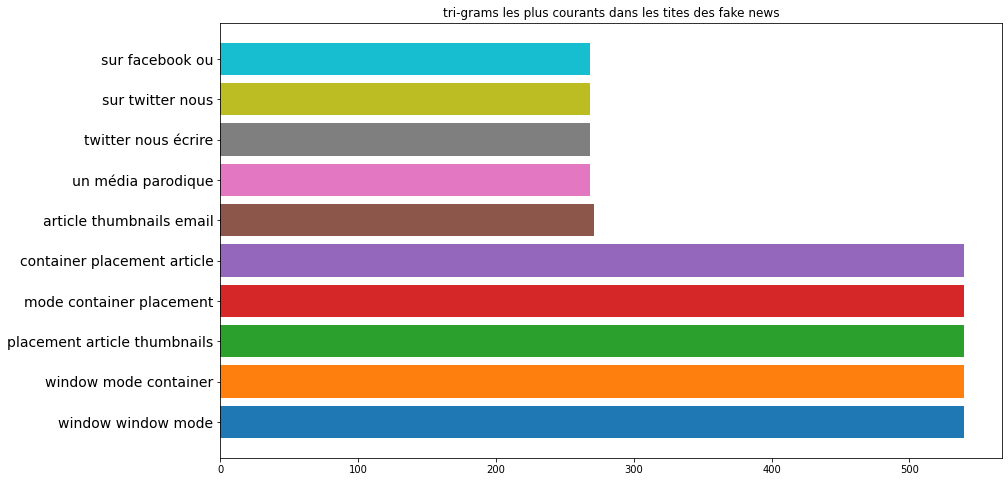

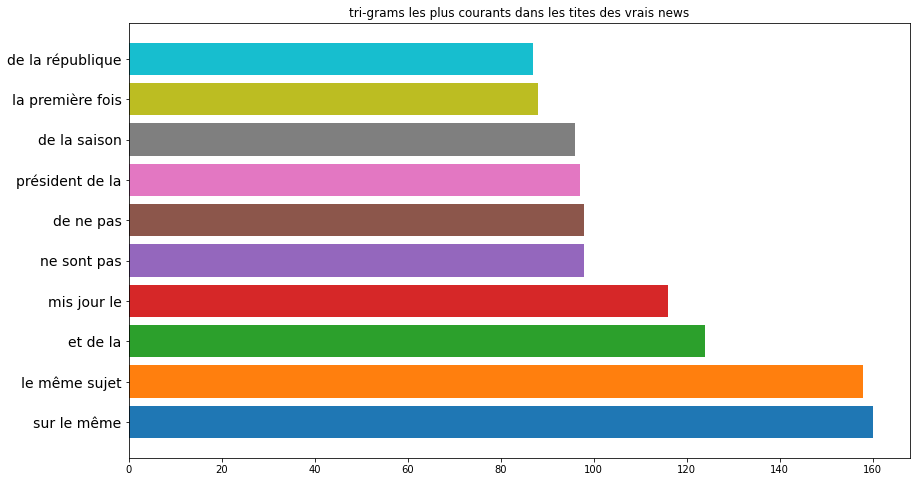

In [22]:
titles = ["tri-grams les plus courants dans les tites des fake news", "tri-grams les plus courants dans les tites des vrais news"]
variables = [ngrams_fake, ngrams_real]
for title, var in zip(titles, variables):
    fig, ax = plt.subplots(figsize=(14,8))
    ax.set_title(title)
    for ngram in var:        
        ax.barh(width=var[ngram], y=ngram)
        ax.invert_yaxis()
        
    plt.tick_params(axis='y', which='major', labelsize=14)    
    plt.show()

## Les nuages de mots pour le contenu

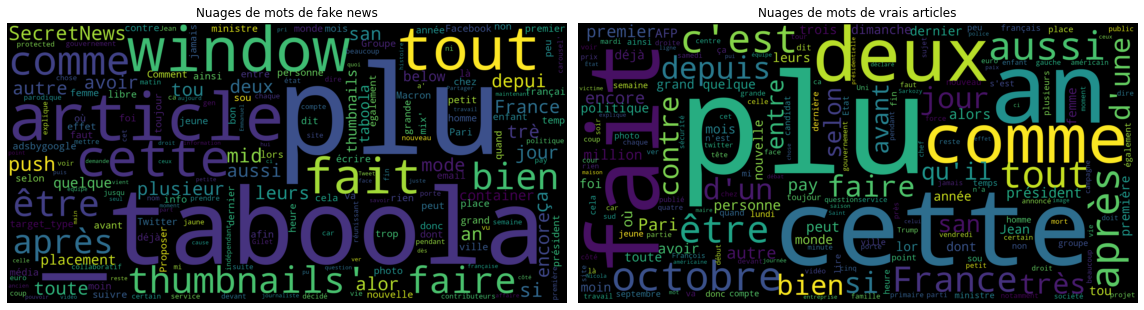

In [23]:
fig, ax = plt.subplots(1,2, figsize=(16,16))

corpus_text = ''.join(fakenews['text'].tolist())
wordcloud = WordCloud(stopwords=french_stopwords, scale = 7, collocations=False).generate(corpus_text)
ax[0].imshow(wordcloud, interpolation='bilinear')
ax[0].axis("off")
ax[0].set_title("Nuages de mots de fake news")

corpus_text = ''.join(realnews['text'].tolist())
wordcloud = WordCloud(stopwords=french_stopwords, scale = 7, collocations=False).generate(corpus_text)
ax[1].imshow(wordcloud, interpolation='bilinear')
ax[1].axis("off")
ax[1].set_title("Nuages de mots de vrais articles")

plt.tight_layout()

## Analyse de sentiement des textes

cette analyse est effectué en utilisant le package vaderSentiment avec un fichier de lexique de vocabulaire français

pour plus de détails sur le package utilisé pour le lexique français :
https://github.com/thomas7lieues/vader_FR

In [7]:
import nltk
from vaderSentiment_fr.vaderSentiment import SentimentIntensityAnalyzer
#telecharger le fichier de lexique
#nltk.download('vader_lexicon')

C:\ProgramData\Anaconda3\lib\site-packages\fuzzywuzzy\fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [13]:
#retourner une valeur standarisé "compound" de text à analyser 
def classify_sentiment(text):
    sid = SentimentIntensityAnalyzer()
    text = text.replace("\n\n", ". ").replace("\n", ". ")
    #Remove URLs
    text = re.sub(r"http\S+", "", text)
    pol = sid.polarity_scores(text)['compound']
    return pol

In [17]:
classify_sentiment("la vie est belle!")

0.2481

In [18]:
classify_sentiment("la vie est la merde!")

-0.2003

In [22]:
classify_sentiment("la vie c'est normale")

0.0

**Attention** la partie d'analyse prend énormement du temps pour s'exécuter (plus de 30min)

In [15]:
fake_sentiments = [classify_sentiment(text) for text in fakenews['text']]
fakenews['sentiment'] = fake_sentiments

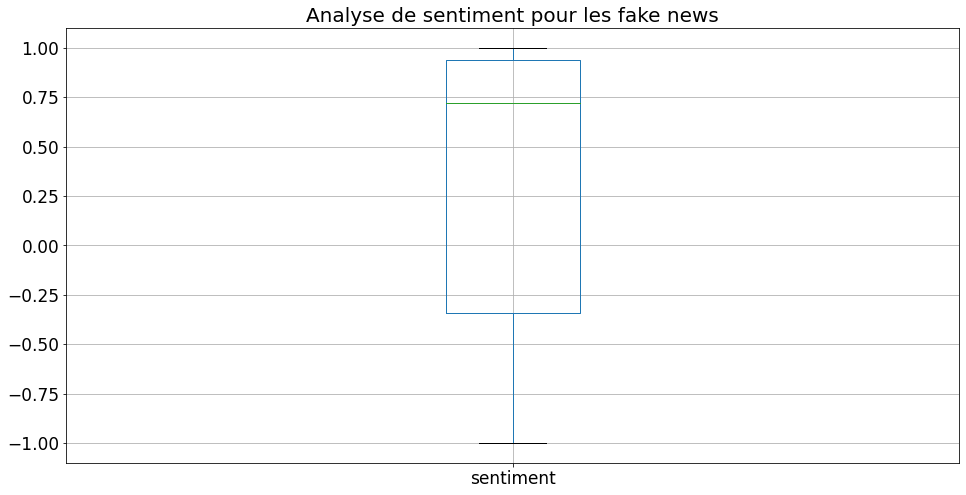

In [16]:
fig, ax = plt.subplots(1,1, figsize=(16,8))
fakenews.boxplot(column=['sentiment'], ax=ax, showfliers=False, fontsize=17)
ax.set_title("Analyse de sentiment pour les fake news", fontsize=20)
plt.show()

In [19]:
real_sentiments = [classify_sentiment(text) for text in realnews['text']]
realnews['sentiment'] = real_sentiments

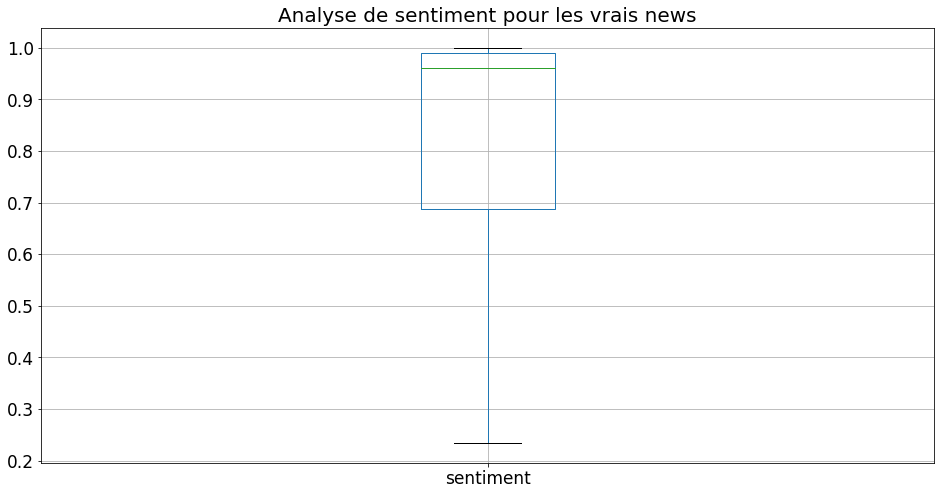

In [20]:
fig, ax = plt.subplots(1,1, figsize=(16,8))
realnews.boxplot(column=['sentiment'], ax=ax, showfliers=False, fontsize=17)
ax.set_title("Analyse de sentiment pour les vrais news", fontsize=20)
plt.show()